In [1]:
%pylab inline

from scipy.fftpack import fft, fftfreq
from scipy.io import wavfile
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Punto 1

/Users/natyCR27/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


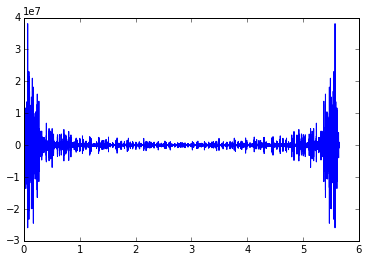

In [2]:
trans_o =numpy.loadtxt("ring.dft", dtype = numpy.complex128) # carga el acrivo  con los  complejos
#print trans_o
sampleRate=22050
timearray=arange(0, len(trans_o)/float(sampleRate), 1/float(sampleRate))
plot(timearray, trans_o)
#print len(trans_o), len(timearray)

[-1  0  0 ...,  0  0  0]


/Users/natyCR27/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


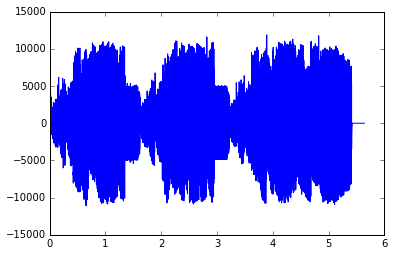

In [3]:
# Antitrasformada 
anti_trans1=np.fft.ifft(trans_o)
w=np.fft.fftfreq(len(trans_o),1)
plot(timearray,anti_trans1)
anti_trans1=np.int16(anti_trans1)
print anti_trans1

In [4]:
# genera el archivo de  audio
#a= real(anti_trans1)
a=np.int16(anti_trans1) # es importante hacerlo nueva mente para quitar el error
wavfile.write('song.wav',sampleRate,a)

##Punto 2 

**(a)**

In [5]:
# Para poder duplicar el tiempo necesito saber los valores de los nuevos tiempo. Por esto interpolo la antitransformada
print len(anti_trans1), len(a), len(timearray)
nueva_anti= interpolate.interp1d(timearray, a , kind='linear')


124395 124395 124395


antiguo 124395 doble 62198


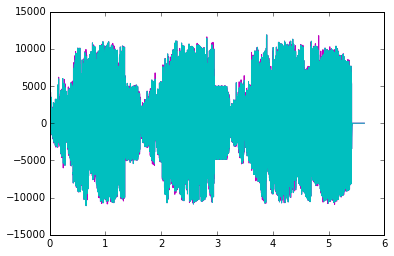

In [6]:
fig=plt.figure()
# despues la evaluo en 2 veces el tiempo, es decir, 2 veces el numero de datos.

double_time=arange(0, len(trans_o)/float(sampleRate), 2*1/float(sampleRate))

print 'antiguo', len(timearray), 'doble', len(double_time)

ax=fig.add_subplot(111)

#ax.plot(timearray[0:3], anti_trans1[0:3], '*m', label='normal')
#ax.plot(double_time[0:3], nueva_anti(double_time)[0:3], 'oc', label='interpolacion')

ax.plot(timearray, anti_trans1, '-m', label='normal')
ax.plot(double_time, nueva_anti(double_time), '-c', label='interpolacion')

**(b)**

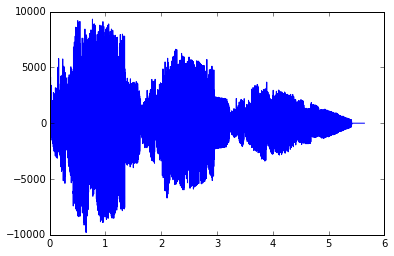

In [7]:
# se  debe multiplicar por una funcion lineal decendiente y que NO modifique la primera amplitud 
#(es decir que sea 1 al inico y 0 al final). 
funcionvolume = linspace(1,0, len(double_time))

anti_trans_volume= nueva_anti(double_time)* funcionvolume

plot(double_time,anti_trans_volume)

In [8]:
# genera el archivo de  audio
c= np.int16(anti_trans_volume)
wavfile.write('songVolume.wav',sampleRate,c) # no reproducir  con  audig¡fonos !!!!!!!!